## PREPARACION

In [1]:
# =============================================================================
# # Reto de Consultoría de Datos: Visualización y Análisis (VERSIÓN CORREGIDA)
# Realizado por: Nexus IA
# =============================================================================

# --- INSTALACIÓN DE LIBRERÍAS ADICIONALES ---
!pip install squarify

# =============================================================================
# SECCIÓN 1: PREPARACIÓN DEL ENTORNO Y CARGA INTELIGENTE DE DATOS
# =============================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from math import pi

# --- Configuración de estilo global para los gráficos ---
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-talk")

# --- PARÁMETRO CLAVE: TAMAÑO DE LA MUESTRA ---
TAMANO_MUESTRA = 10000

# --- Función de limpieza para convertir valores monetarios a números ---
def convertir_a_numerico(valor):
    if isinstance(valor, str):
        valor_limpio = valor.replace('$', '').strip()
        sufijo = valor_limpio[-1].upper()
        if sufijo == 'M':
            return float(valor_limpio[:-1]) * 1_000_000
        elif sufijo == 'B':
            return float(valor_limpio[:-1]) * 1_000_000_000
    try:
        return float(valor)
    except (ValueError, TypeError):
        return None

# --- Carga y limpieza del dataset de Acciones (Stocks) ---
print(f"🔄 Procesando una muestra de {TAMANO_MUESTRA:,} filas de 'stocks.csv'...")
try:
    df_stocks = pd.read_csv('stocks.csv', nrows=TAMANO_MUESTRA)
    df_stocks['vol_'] = df_stocks['vol_'].apply(convertir_a_numerico)
    df_stocks['timestamp'] = pd.to_datetime(df_stocks['timestamp'])
    df_stocks.dropna(subset=['vol_'], inplace=True)
    print(f"✅ Muestra de 'stocks.csv' cargada. {len(df_stocks)} filas en memoria.")
except Exception as e:
    print(f"❌ ERROR al procesar 'stocks.csv': {e}")

# =============================================================================
# PASO ADICIONAL CLAVE: OBTENER DATOS ÚNICOS POR ACTIVO
# Para evitar el error de que una sola empresa aparezca varias veces en un ranking,
# creamos un nuevo DataFrame que contiene solo el registro más reciente de cada activo.
# =============================================================================
print("\n🔄 Creando listas de activos únicos con sus datos más recientes...")
# Ordenamos por fecha y eliminamos duplicados, quedándonos con la primera aparición (la más reciente)
df_stocks_latest = df_stocks.sort_values('timestamp', ascending=False).drop_duplicates('name')
print("✅ Listas de activos únicos creadas.")


🔄 Procesando una muestra de 10,000 filas de 'stocks.csv'...
❌ ERROR al procesar 'stocks.csv': [Errno 2] No such file or directory: 'stocks.csv'

🔄 Creando listas de activos únicos con sus datos más recientes...


NameError: name 'df_stocks' is not defined

## GRAFICOS

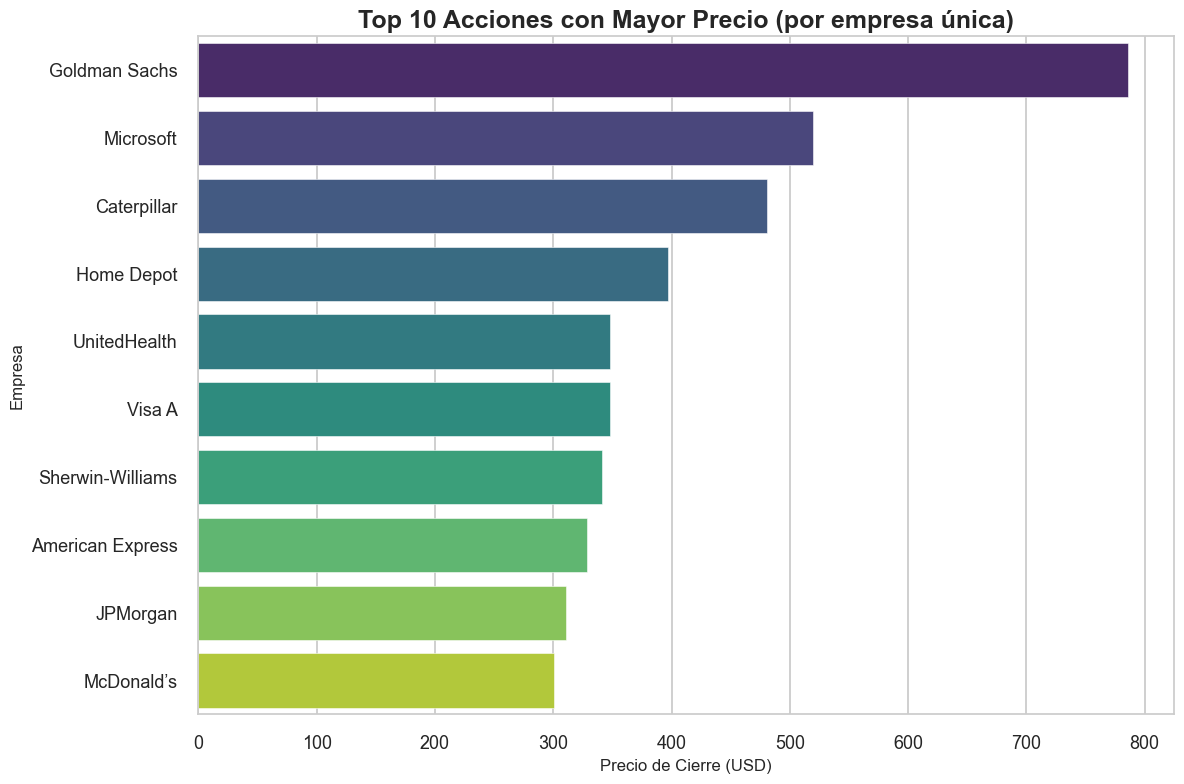

In [ ]:
# --- 1. Ranking de las 10 Acciones Más Caras ---
# Gráfico: Barras Horizontales.
# Justificación: Identifica a los líderes por valor nominal. Usamos df_stocks_latest para asegurar 10 empresas distintas.
plt.figure(figsize=(12, 8))
top_10_caras = df_stocks_latest.sort_values('last', ascending=False).head(10)
sns.barplot(x='last', y='name', data=top_10_caras, palette='viridis', hue='name', dodge=False)
plt.title('Top 10 Acciones con Mayor Precio (por empresa única)', fontsize=18, fontweight='bold')
plt.xlabel('Precio de Cierre (USD)', fontsize=12)
plt.ylabel('Empresa', fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

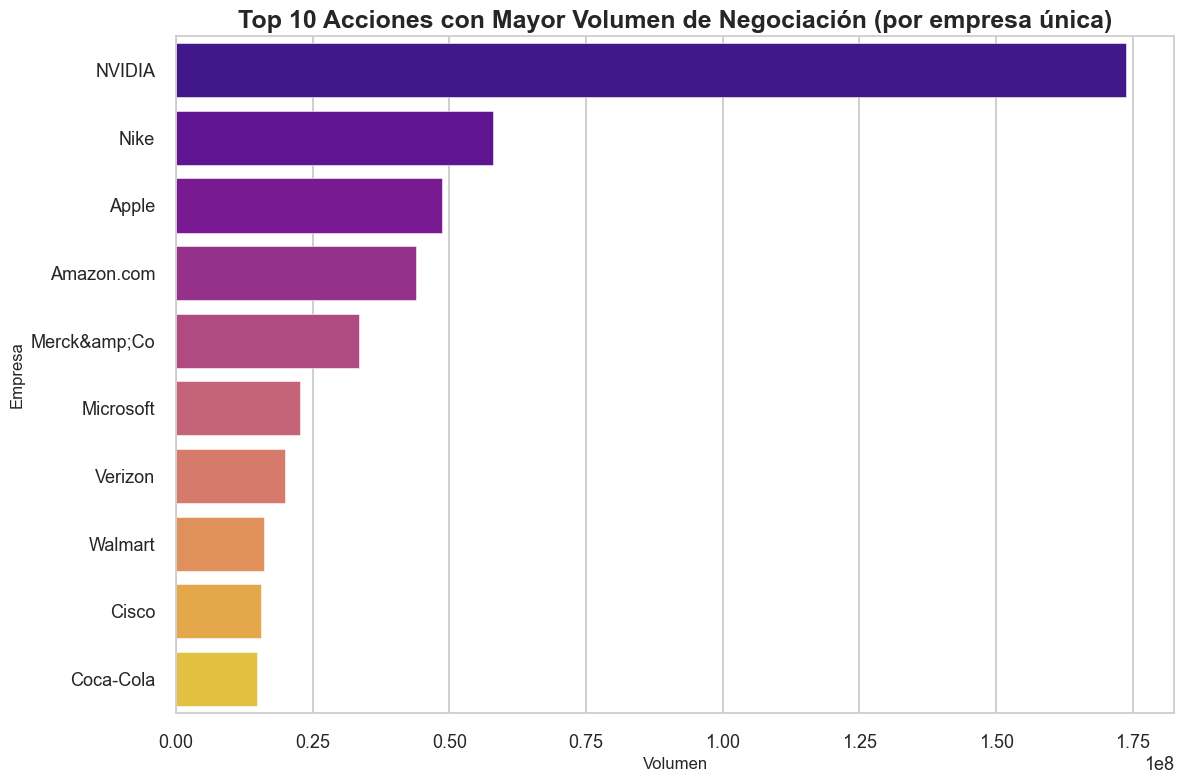

In [ ]:
# --- 2. Ranking de las 10 Acciones con Mayor Volumen de Negociación ---
# Gráfico: Barras Horizontales.
# Justificación: Muestra qué acciones son más líquidas y activamente negociadas, usando la lista de empresas únicas.
plt.figure(figsize=(12, 8))
top_10_volumen = df_stocks_latest.sort_values('vol_', ascending=False).head(10)
sns.barplot(x='vol_', y='name', data=top_10_volumen, palette='plasma', hue='name', dodge=False)
plt.title('Top 10 Acciones con Mayor Volumen de Negociación (por empresa única)', fontsize=18, fontweight='bold')
plt.xlabel('Volumen', fontsize=12)
plt.ylabel('Empresa', fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

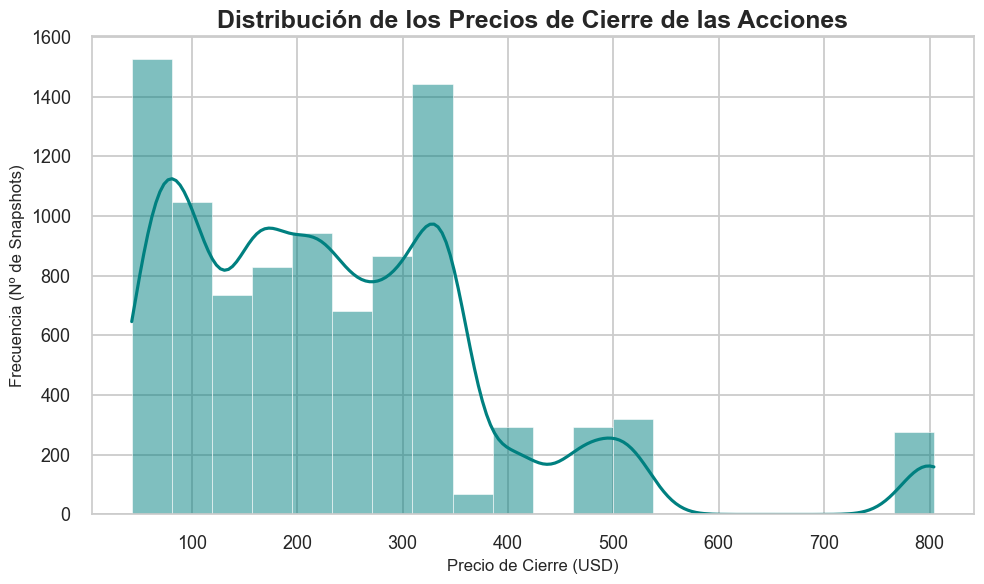

In [ ]:
# --- 3. Distribución de los Precios de las Acciones ---
# Gráfico: Histograma.
# Justificación: Muestra la estructura de precios del mercado. Aquí usamos la muestra completa (df_stocks) para tener más datos.
plt.figure(figsize=(10, 6))
sns.histplot(df_stocks['last'], kde=True, color='teal', bins=20)
plt.title('Distribución de los Precios de Cierre de las Acciones', fontsize=18, fontweight='bold')
plt.xlabel('Precio de Cierre (USD)', fontsize=12)
plt.ylabel('Frecuencia (Nº de Snapshots)', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Filtro: top 10 acciones por volumen ---
top10 = df_stocks_latest.nlargest(10, 'vol_')

# Paleta de colores viva
sns.set_palette("husl")

print(top10)

             timestamp          name    last    high     low  chg_   chg_%  \
20 2025-10-02 13:00:01        NVIDIA  187.24  188.14  183.90  0.66  +0.35%   
21 2025-10-02 13:00:01          Nike   74.20   74.69   71.61  4.47  +6.41%   
4  2025-10-02 13:00:01         Apple  255.45  258.79  254.93  0.82  +0.32%   
1  2025-10-02 13:00:01    Amazon.com  220.63  222.15  216.61  1.06  +0.48%   
18 2025-10-02 13:00:01  Merck&amp;Co   90.13   90.75   85.19  6.20  +7.39%   
19 2025-10-02 13:00:01     Microsoft  519.71  520.51  511.69  1.76  +0.34%   
26 2025-10-02 13:00:01       Verizon   43.83   44.09   43.45 -0.12  -0.27%   
28 2025-10-02 13:00:01       Walmart  101.96  102.86  100.55 -1.10  -1.07%   
8  2025-10-02 13:00:01         Cisco   68.75   68.82   67.69  0.33  +0.48%   
10 2025-10-02 13:00:01     Coca-Cola   66.78   66.83   66.29  0.46  +0.69%   

           vol_   time  
20  173840000.0  01/10  
21   57920000.0  01/10  
4    48710000.0  01/10  
1    43930000.0  01/10  
18   33460000.0 

# 1️⃣ Gráfico de barras: volumen de cada acción
# Muestra qué acciones tienen mayor volumen negociado.

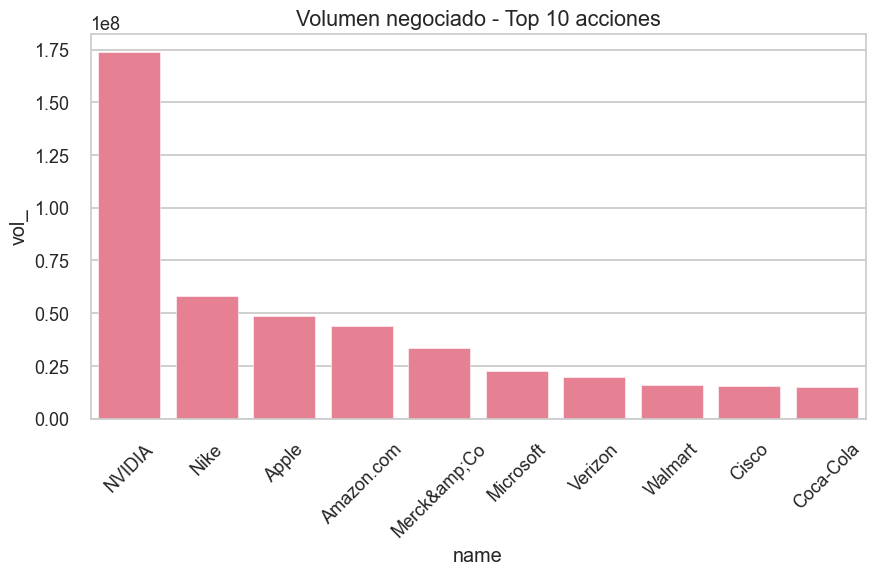

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='name', y='vol_', data=top10)
plt.title("Volumen negociado - Top 10 acciones")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Gráfico de barras horizontales: precio último (last)
# Ideal para comparar precios entre empresas.

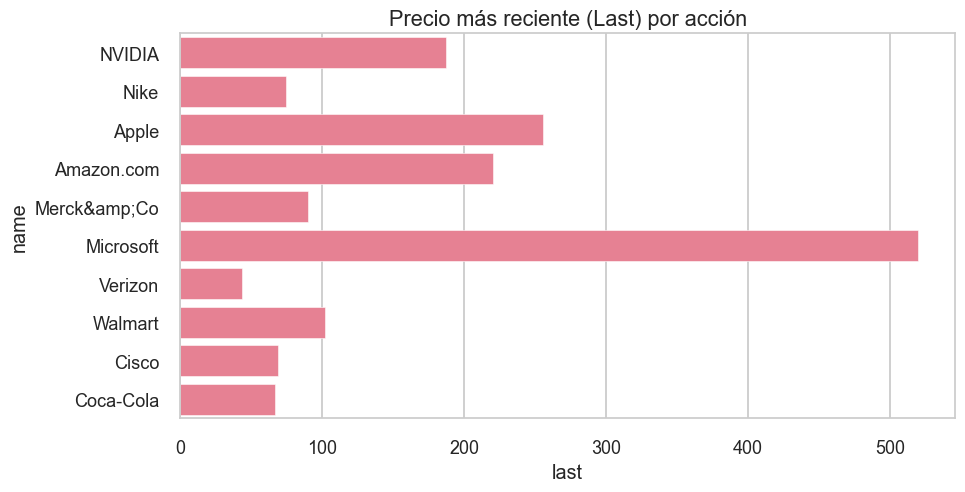

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='last', y='name', data=top10)
plt.title("Precio más reciente (Last) por acción")
plt.show()

# 3️⃣ Gráfico de puntos (stripplot): cambio porcentual
# Cada punto muestra el % de variación de una acción.

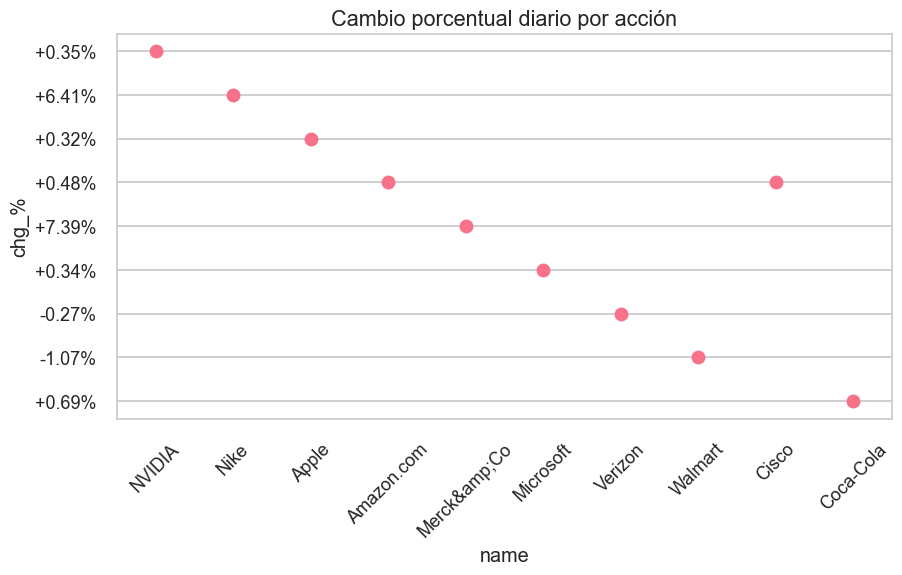

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x='name', y='chg_%', data=top10, size=10)
plt.title("Cambio porcentual diario por acción")
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Gráfico de dispersión (scatterplot): relación entre precio y volumen
# Permite ver si los activos más caros también mueven más volumen.

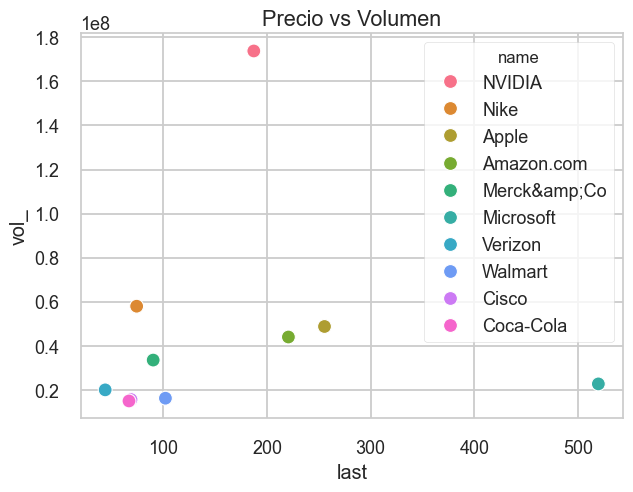

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='last', y='vol_', hue='name', data=top10, s=100)
plt.title("Precio vs Volumen")
plt.show()

# 5️⃣ Gráfico de caja (boxplot): rango de precios (high y low)
# Muestra la variación diaria de precios (alto-bajo) para cada acción.

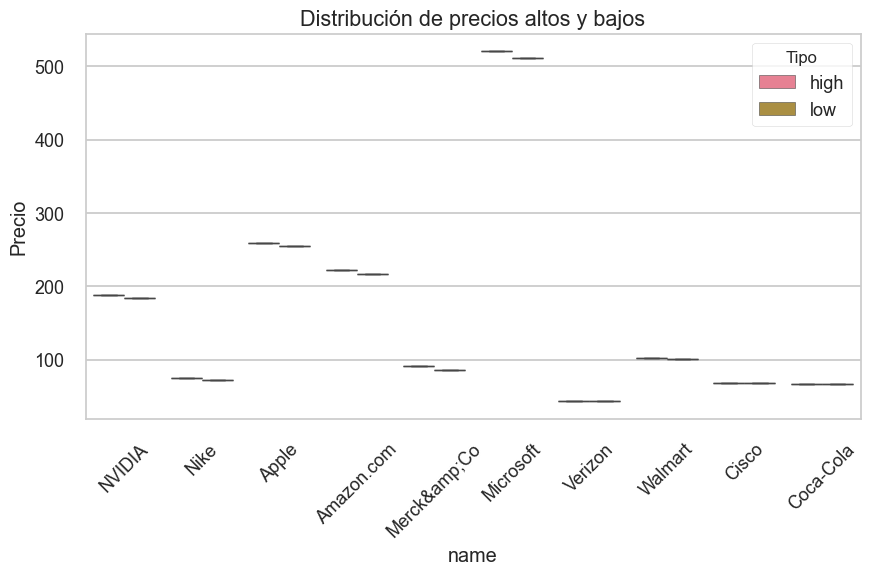

In [ ]:
top10_melt = top10.melt(id_vars=['name'], value_vars=['high','low'], var_name='Tipo', value_name='Precio')
plt.figure(figsize=(10,5))
sns.boxplot(x='name', y='Precio', hue='Tipo', data=top10_melt)
plt.title("Distribución de precios altos y bajos")
plt.xticks(rotation=45)
plt.show()


# 6️⃣ Gráfico de violín (violinplot): precios altos y bajos
# Similar al boxplot, pero muestra la forma de la distribución.

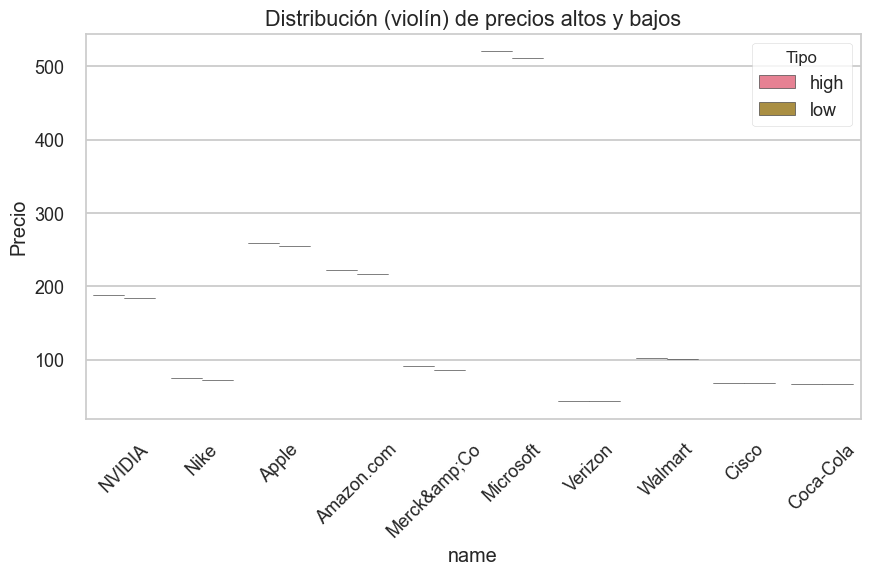

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='name', y='Precio', hue='Tipo', data=top10_melt, split=True)
plt.title("Distribución (violín) de precios altos y bajos")
plt.xticks(rotation=45)
plt.show()

# 7️⃣ Heatmap (mapa de calor): correlaciones entre variables numéricas
# Permite ver qué variables se relacionan más (por ejemplo, last vs high).

In [ ]:
# --- Verificamos si hay valores no numéricos en las columnas relevantes ---
cols_numericas = ['last','high','low','chg_','chg_%','vol_']
for col in cols_numericas:
    no_numericos = df_stocks_latest[~df_stocks_latest[col].astype(str).str.replace('[\d\.\-\+%]', '', regex=True).str.strip().eq('')]
    if len(no_numericos) > 0:
        print(f"⚠️ Columna '{col}' tiene valores no numéricos. Ejemplo:")
        print(no_numericos[col].head())


In [ ]:
# --- Limpieza robusta de todas las columnas numéricas ---
for col in ['last','high','low','chg_','chg_%','vol_']:
    df_stocks_latest[col] = (
        df_stocks_latest[col]
        .astype(str)
        .str.replace('[\$,%,]', '', regex=True)  # quitamos símbolos
        .str.replace(' ', '', regex=False)       # quitamos espacios
    )
    df_stocks_latest[col] = pd.to_numeric(df_stocks_latest[col], errors='coerce')  # convertimos a float


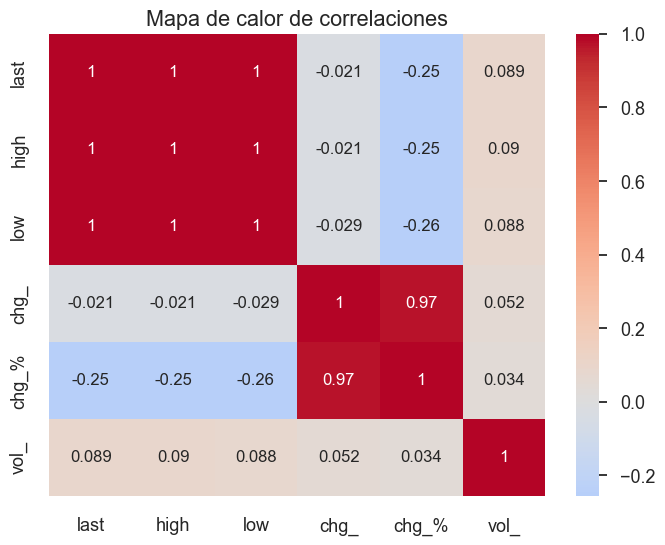

In [ ]:
top10 = df_stocks_latest.nlargest(10, 'vol_')

plt.figure(figsize=(8,6))
sns.heatmap(top10[['last','high','low','chg_','chg_%','vol_']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de correlaciones")
plt.show()


# 8️⃣ Pairplot: relaciones múltiples entre variables clave
# Muestra varios gráficos de dispersión cruzados entre variables.

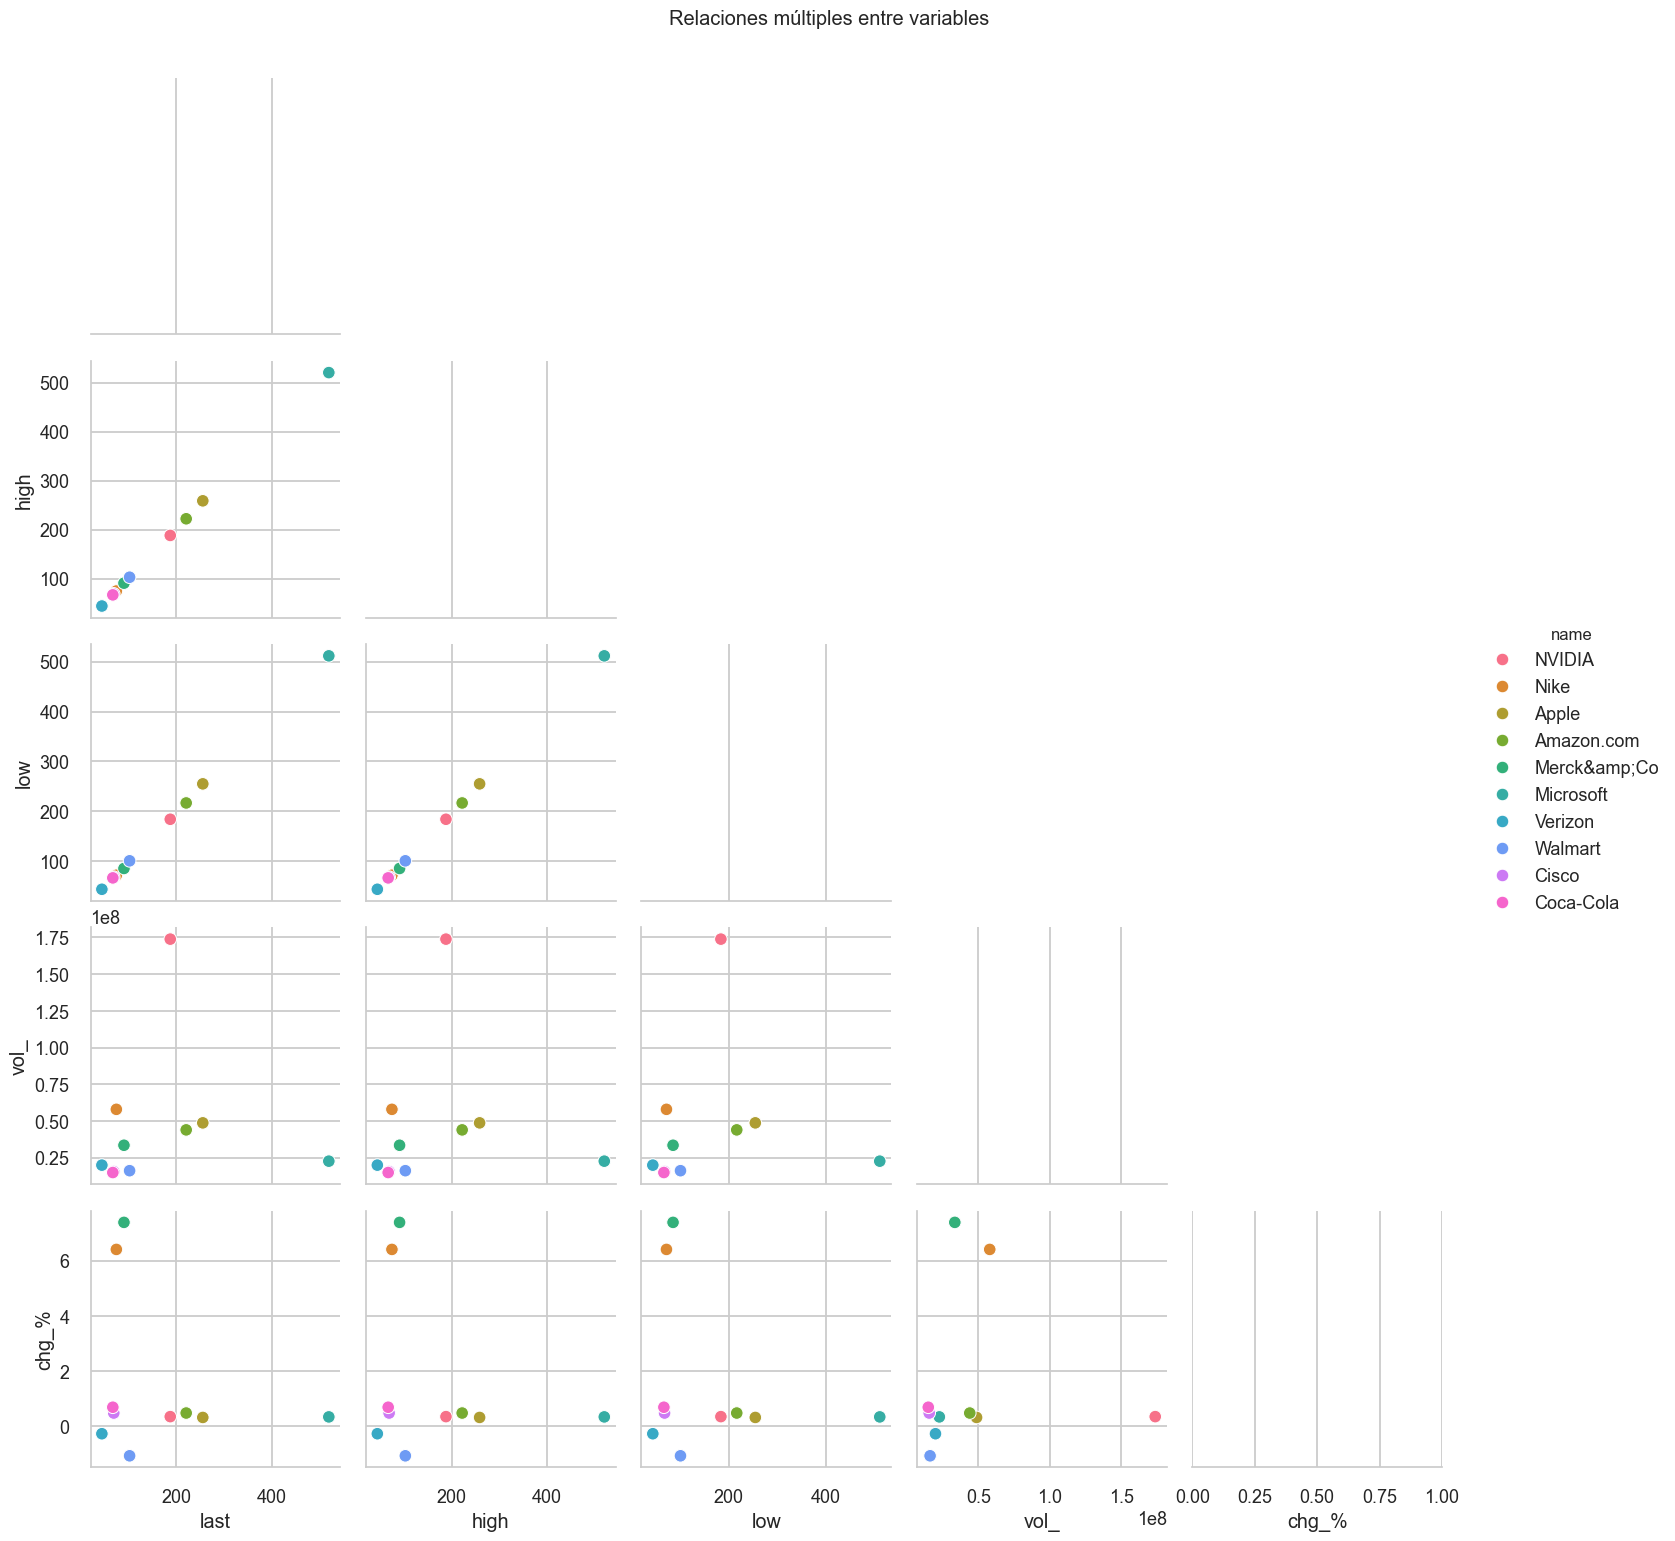

In [ ]:
sns.pairplot(
    top10[['name','last','high','low','vol_','chg_%']],
    hue='name',
    corner=True,
    height=3.0  # aumenta el tamaño de cada subgráfico (por defecto es 2.5)
)
plt.suptitle("Relaciones múltiples entre variables", y=1.03)
plt.show()



# 9️⃣ Barplot agrupado: precio alto vs bajo
# Comparación directa entre precios altos y bajos por acción.

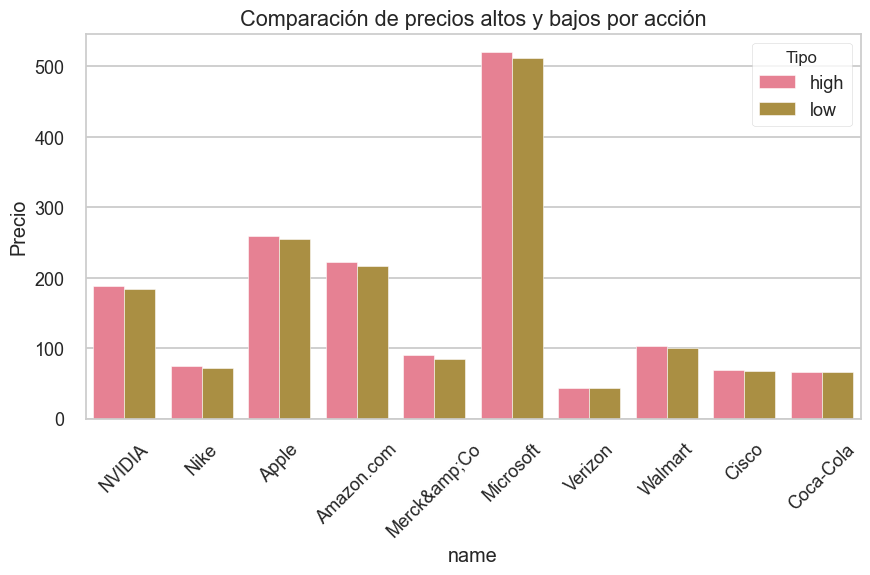

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='name', y='Precio', hue='Tipo', data=top10_melt)
plt.title("Comparación de precios altos y bajos por acción")
plt.xticks(rotation=45)
plt.show()

# 🔟 TreeMap (con Squarify): proporción de volumen
# Visualiza qué tan grande es el volumen de cada acción respecto al total.

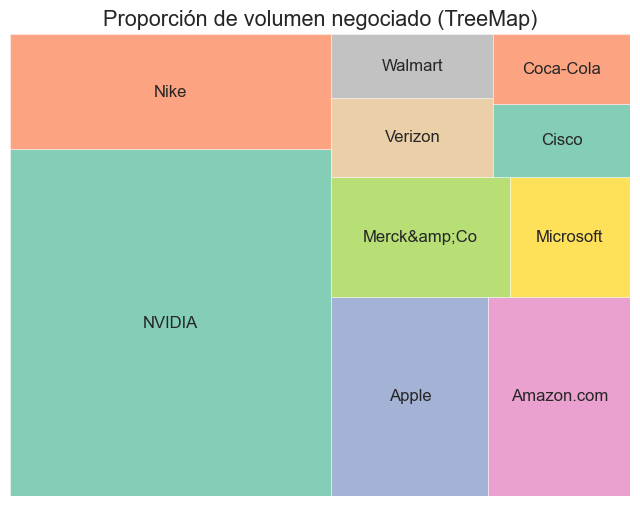

In [ ]:
import squarify
plt.figure(figsize=(8,6))
squarify.plot(sizes=top10['vol_'], label=top10['name'], alpha=.8, color=sns.color_palette("Set2"))
plt.title("Proporción de volumen negociado (TreeMap)")
plt.axis('off')
plt.show()